#**DATA SCIENCE INTERNSHIP UNDER BHARAT INTERN**
#**Name: AKHIL NAIR**
#**Email: Akhil0312nair@gmail.com**
#**Question: Build a predictive model to determine thelikelihood of survival for passengers on the Titanic using data science techniques in Python.**




#**Importing all the necessary libraries for the execution**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)
import warnings
warnings.filterwarnings('ignore')

#**Importing dataset from google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datascienceworks/TitanicSurvival/TitanicDataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000000,C148,C


#**Printing out the column names of the dataset**

In [ ]:
column_list = (list(df.columns))
print(column_list)


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


#**Data types of the columns**

In [ ]:
print("Data types of the columns in the data frame:", df.dtypes)

Data types of the columns in the data frame: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#**Information about the dataset**

In [ ]:
print("Information about the data frame:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Information about the data frame: None


#**Checking missing values or null values in the dataset**

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


#**Filling missing values using mean**

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


#**Finding out the ratio of people survived v/s people who didnt survived**

In [ ]:
classes=df['Survived'].value_counts()
non_survived_share=round(classes[0]/df['Survived'].count()*100,2)
survived_share=round(classes[1]/df['Survived'].count()*100, 2)
print("Non-Survived : {} %".format(survived_share))
print("    Survived : {} %".format(non_survived_share))

Non-Survived : 38.38 %
    Survived : 61.62 %


#**Graphical Distribution**

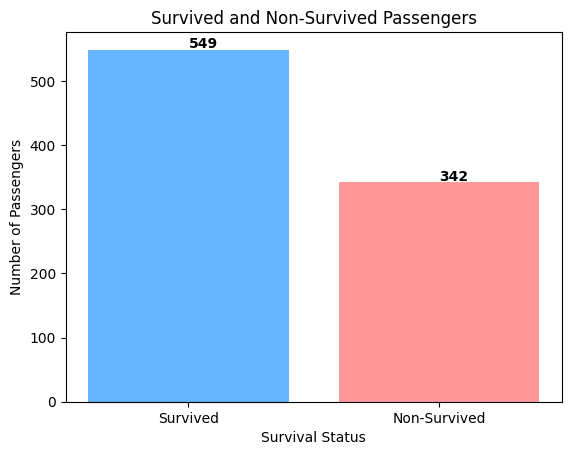

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
classes = df['Survived'].value_counts()
labels = ['Survived', 'Non-Survived']
sizes = classes.sort_index().values
colors = ['#66b3ff', '#ff9999']

plt.bar(labels, sizes, color=colors)
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.title("Survived and Non-Survived Passengers")

for i, v in enumerate(sizes):
    plt.text(i, v + 3, str(v), color='black', fontweight='bold')

plt.show()

#**Graphihcal distribution to check the ages of people**

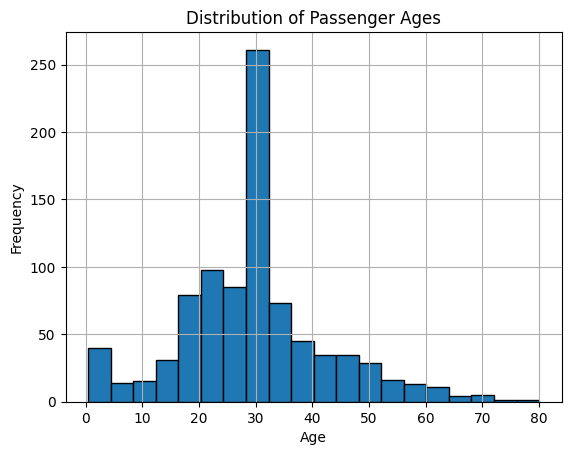

In [ ]:
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')
plt.grid(True)
plt.show()

#**Dropping unncessary fields**

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.250000,S
1,1,1,female,38.000000,1,0,71.283300,C
2,1,3,female,26.000000,0,0,7.925000,S
3,1,1,female,35.000000,1,0,53.100000,S
4,0,3,male,35.000000,0,0,8.050000,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.000000,S
887,1,1,female,19.000000,0,0,30.000000,S
888,0,3,female,29.699118,1,2,23.450000,S
889,1,1,male,26.000000,0,0,30.000000,C


#**Converting categorical columns into numerical columns**

In [ ]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

#**Splitting the data into X and Y for modelling**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Sex']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y.shape,X.shape

((891,), (891, 7))

#**Converting the X and Y into arrays**

In [ ]:
X_raw = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Split the data into non-test/test data
X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X_raw, y, test_size=1/10, shuffle=True, random_state=0)

# Split the non-test data into train/validation data
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=1/9, shuffle=True, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##Model Building

#**Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
}

# Instantiate logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_raw, y_train)

# Get best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate model on validation set
best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(X_valid_raw, y_valid)
print("Validation Accuracy:", validation_accuracy)

# Make predictions on test set
test_accuracy = best_model.score(X_test_raw, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7907318034078596
Validation Accuracy: 0.8651685393258427
Test Accuracy: 0.7888888888888889


#**Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Initialize GridSearchCV for Random Forest
rf_grid = GridSearchCV(rf_classifier, rf_params, cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV for Random Forest
rf_grid.fit(X_train_raw, y_train)

# Best parameters for Random Forest
best_rf_params = rf_grid.best_params_
print("Best Parameters for Random Forest:", best_rf_params)

# Best accuracy for Random Forest
best_rf_accuracy = rf_grid.best_score_
print("Best Accuracy for Random Forest:", best_rf_accuracy)

# All parameters and their respective scores
print("All parameters and their scores:")
means = rf_grid.cv_results_['mean_test_score']
stds = rf_grid.cv_results_['std_test_score']
params = rf_grid.cv_results_['params']
for mean, std, params in zip(means, stds, params):
    print(f"Accuracy: {mean} (±{std}) with Params: {params}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy for Random Forest: 0.8244459765586527
All parameters and their scores:
Accuracy: 0.8034275583571358 (±0.02657536496873537) with Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7950261006599035 (±0.030005912412240945) with Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8006205062543092 (±0.024890962823208816) with Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8160248202501723 (±0.02314057413296739) with Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8216487737614498 (±0.02743070694925231) with Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samp

In [ ]:
from sklearn.metrics import accuracy_score

# Best parameters for Random Forest
best_rf_params = rf_grid.best_params_
print("Final Best Parameters for Random Forest:", best_rf_params)

# Best score for Random Forest
best_rf_score = rf_grid.best_score_
print("Best Score for Random Forest:", best_rf_score)

# Validation accuracy for Random Forest
validation_accuracy_lr = rf_grid.score(X_valid_raw, y_valid)
print("Validation Accuracy for Random Forest:", validation_accuracy_lr)

# Test accuracy for Random Forest
test_accuracy_lr = accuracy_score(y_test, rf_grid.best_estimator_.predict(X_test_raw))
print("Test Accuracy for Random Forest:", test_accuracy_lr)


Final Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score for Random Forest: 0.8244459765586527
Validation Accuracy for Random Forest: 0.8876404494382022
Test Accuracy for Random Forest: 0.8


#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for Decision Tree
dt_params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV for Decision Tree
dt_grid = GridSearchCV(dt_classifier, dt_params, cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV for Decision Tree
dt_grid.fit(X_train_raw, y_train)

# Best parameters for Decision Tree
best_dt_params = dt_grid.best_params_
print("Best Parameters for Decision Tree:", best_dt_params)

# Best accuracy for Decision Tree
best_dt_accuracy = dt_grid.best_score_
print("Best Accuracy for Decision Tree:", best_dt_accuracy)

# Validation accuracy for Decision Tree
validation_accuracy_dt = dt_grid.score(X_valid_raw, y_valid)
print("Validation Accuracy for Decision Tree:", validation_accuracy_dt)

# Test accuracy for Decision Tree
test_accuracy_dt = accuracy_score(y_test, dt_grid.best_estimator_.predict(X_test_raw))
print("Test Accuracy for Decision Tree:", test_accuracy_dt)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Decision Tree: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy for Decision Tree: 0.8118093174431202
Validation Accuracy for Decision Tree: 0.8202247191011236
Test Accuracy for Decision Tree: 0.7666666666666667


#**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid for Gradient Boosting
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Initialize GridSearchCV for Gradient Boosting
gb_grid = GridSearchCV(gb_classifier, gb_params, cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV for Gradient Boosting
gb_grid.fit(X_train_raw, y_train)

# Best parameters for Gradient Boosting
best_gb_params = gb_grid.best_params_
print("Best Parameters for Gradient Boosting:", best_gb_params)

# Best accuracy for Gradient Boosting
best_gb_accuracy = gb_grid.best_score_
print("Best Accuracy for Gradient Boosting:", best_gb_accuracy)

# Validation accuracy for Gradient Boosting
validation_accuracy_gb = gb_grid.score(X_valid_raw, y_valid)
print("Validation Accuracy for Gradient Boosting:", validation_accuracy_gb)

# Test accuracy for Gradient Boosting
test_accuracy_gb = accuracy_score(y_test, gb_grid.best_estimator_.predict(X_test_raw))
print("Test Accuracy for Gradient Boosting:", test_accuracy_gb)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy for Gradient Boosting: 0.8272924258839751
Validation Accuracy for Gradient Boosting: 0.8764044943820225
Test Accuracy for Gradient Boosting: 0.8


#**Summarizing the data**

In [ ]:
# Create a dictionary to store all the scores
scores = {
    "Logistic Regression": {
        "Best Parameters": grid_search.best_params_,
        "Best Score": grid_search.best_score_,
        "Validation Accuracy": validation_accuracy,
        "Test Accuracy": test_accuracy
    },
    "Random Forest": {
        "Best Parameters": best_rf_params,
        "Best Score": best_rf_accuracy,
        "Validation Accuracy": validation_accuracy_lr,
        "Test Accuracy": test_accuracy_lr
    },
    "Decision Tree": {
        "Best Parameters": best_dt_params,
        "Best Score": best_dt_accuracy,
        "Validation Accuracy": validation_accuracy_dt,
        "Test Accuracy": test_accuracy_dt
    },
    "Gradient Boosting": {
        "Best Parameters": best_gb_params,
        "Best Score": best_gb_accuracy,
        "Validation Accuracy": validation_accuracy_gb,
        "Test Accuracy": test_accuracy_gb
    }
}

# Display all the scores
print("Scores for different classifiers:")
for model, data in scores.items():
    print(f"\n{model}:")
    for key, value in data.items():
        print(f"{key}: {value}")


Scores for different classifiers:

Logistic Regression:
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7907318034078596
Validation Accuracy: 0.8651685393258427
Test Accuracy: 0.7888888888888889

Random Forest:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8244459765586527
Validation Accuracy: 0.8876404494382022
Test Accuracy: 0.8

Decision Tree:
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.8118093174431202
Validation Accuracy: 0.8202247191011236
Test Accuracy: 0.7666666666666667

Gradient Boosting:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.8272924258839751
Validation Accuracy: 0.8764044943820225
Test Accuracy: 0.8


#**Printing information in a tabular form**

In [ ]:
from tabulate import tabulate

# Define the data in a tabular format
data = [
    ["Logistic Regression", grid_search.best_params_, grid_search.best_score_, validation_accuracy_lr, test_accuracy_lr],
    ["Random Forest", best_rf_params, best_rf_accuracy, validation_accuracy_lr, test_accuracy_lr],
    ["Decision Tree", best_dt_params, best_dt_accuracy, validation_accuracy_dt, test_accuracy_dt],
    ["Gradient Boosting", best_gb_params, best_gb_accuracy, validation_accuracy_gb, test_accuracy_gb]
]

# Define column headers
headers = ["Classifier", "Best Parameters", "Best Score", "Validation Accuracy", "Test Accuracy"]

# Display the table
print("Scores for different classifiers:")
print("\n")
print(tabulate(data, headers=headers))


Scores for different classifiers:


Classifier           Best Parameters                                                                                                Best Score    Validation Accuracy    Test Accuracy
-------------------  -----------------------------------------------------------------------------------------------------------  ------------  ---------------------  ---------------
Logistic Regression  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}                                                               0.790732               0.88764          0.8
Random Forest        {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}                            0.824446               0.88764          0.8
Decision Tree        {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}                                                0.811809               0.820225         0.766667
Gradient Boosting    {'learning_rate': 0.1, 'max_depth': 3,

##**Considering both the validation accuracy and test accuracy, Random Forest and Gradient Boosting perform relatively better compared to Logistic Regression and Decision Tree. Random Forest has a slightly higher test accuracy compared to Gradient Boosting, but Gradient Boosting has a slightly higher best score.**##